In [1]:
import pandas as pd
import numpy as np

In [3]:
# New York City Airbnb Open Data
data = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv")

In [4]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
for col in data.columns:
    print(col)
    print(data[col].unique()[:5])
    print(data[col].nunique())
    print()

id
[2539 2595 3647 3831 5022]
48895

name
['Clean & quiet apt home by the park' 'Skylit Midtown Castle'
 'THE VILLAGE OF HARLEM....NEW YORK !' 'Cozy Entire Floor of Brownstone'
 'Entire Apt: Spacious Studio/Loft by central park']
47905

host_id
[2787 2845 4632 4869 7192]
37457

host_name
['John' 'Jennifer' 'Elisabeth' 'LisaRoxanne' 'Laura']
11452

neighbourhood_group
['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
5

neighbourhood
['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem']
221

latitude
[40.64749 40.75362 40.80902 40.68514 40.79851]
19048

longitude
[-73.97237 -73.98377 -73.9419  -73.95976 -73.94399]
14718

room_type
['Private room' 'Entire home/apt' 'Shared room']
3

price
[149 225 150  89  80]
674

minimum_nights
[ 1  3 10 45  2]
109

number_of_reviews
[  9  45   0 270  74]
394

last_review
['2018-10-19' '2019-05-21' nan '2019-07-05' '2018-11-19']
1764

reviews_per_month
[0.21 0.38  nan 4.64 0.1 ]
937

calculated_host_listings_count
[6 2 1 4 3]
47

avail

- Choose columns to input in lin reg
    - categorical: neighbourhood_group, neighbourhood, room_type, (last_review: today - last_review)
    - variable: number_of_reviews, minimum_nights, reviews_per_month, (availability_365)
- Output variable: price

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:xlabel='price', ylabel='Count'>

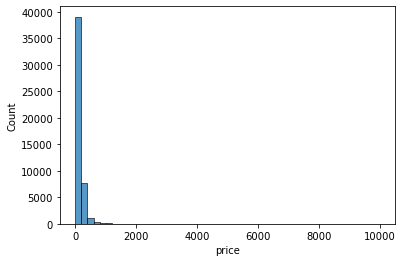

In [8]:
sns.histplot(data.price, bins = 50)

data is in the shape "long tail"

<AxesSubplot:xlabel='price', ylabel='Count'>

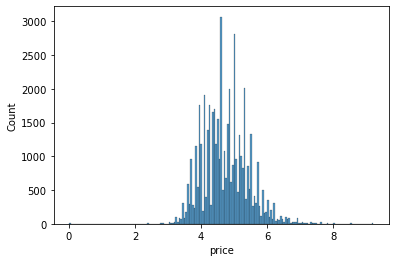

In [9]:
sns.histplot(np.log1p(data.price))

Features for homework: 'latitude',
'longitude',
'price',
'minimum_nights',
'number_of_reviews',
'reviews_per_month',
'calculated_host_listings_count',
'availability_365'

In [10]:
columns = ['latitude',
'longitude',
'price',
'minimum_nights',
'number_of_reviews',
'reviews_per_month',
'calculated_host_listings_count',
'availability_365']

In [13]:
# Question 1:
data_hw = data[columns]
data_hw.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [14]:
# Question 2:
data_hw.minimum_nights.median()

3.0

In [39]:
# data prep
n = len(data_hw)
n_train = int(n * 0.6)
n_val = int(n * 0.2)
n_test = n - n_train - n_val

idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_train = data_hw.iloc[idx[:n_train]]
df_val = data_hw.iloc[idx[n_train:n_train+n_val]]
df_test = data_hw.iloc[idx[n_train+n_val:]]

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log1p(df_train["price"])
y_val = np.log1p(df_val["price"])
y_test = np.log1p(df_test["price"])

del df_train["price"]
del df_val["price"]
del df_test["price"]

In [42]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [57]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [72]:
# Question 3.Option 1
df_train_zero = df_train.fillna(0)
X_train_zero = df_train_zero.values

w0_zero, w_zero = train_linear_regression(X_train_zero, y_train)

#w0_zero, w_zero

y_pred_zero = w0_zero + X_train_zero.dot(w_zero)

rmse_zero = rmse(y_train, y_pred_zero)

In [61]:
# Question 3.Option 2
df_train_mean = df_train.fillna(data_hw["reviews_per_month"].mean())
X_train_mean = df_train_mean.values

w0_mean, w_mean = train_linear_regression(X_train_mean, y_train)

y_pred_mean = w0_mean + X_train_mean.dot(w_mean)

rmse_mean = rmse(y_val, y_pred_mean)

In [64]:
print("RMSE for zero fill: {}".format(round(rmse_zero, 2)))
print("RMSE for mean fill: {}".format(round(rmse_mean, 2)))

RMSE for zero fill: 0.64
RMSE for mean fill: 0.64


no difference for option 1 and option 2

In [65]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [70]:
# Question 4, use df_train_zero
r_eval = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
X_val_zero = df_val.fillna(0).values
for r in r_eval:
    w0, w = train_linear_regression_reg(X_train_zero, y_train, r)
    y_pred_zero = w0 + X_val_zero.dot(w)
    score = round(rmse(y_val, y_pred_zero), 2)
    print(r, score)

0 0.64
1e-06 0.64
0.0001 0.64
0.001 0.64
0.01 0.66
0.1 0.68
1 0.68
5 0.68
10 0.68


Choose r = 0

In [81]:
# Question 5
seed = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
score_list = []
for s in seed:
    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)

    df_train = data_hw.iloc[idx[:n_train]]
    df_val = data_hw.iloc[idx[n_train:n_train+n_val]]
    df_test = data_hw.iloc[idx[n_train+n_val:]]

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = np.log1p(df_train["price"])
    y_val = np.log1p(df_val["price"])
    y_test = np.log1p(df_test["price"])

    del df_train["price"]
    del df_val["price"]
    del df_test["price"]
    
    # Train model
    X_train_zero = df_train.fillna(0).values
    w0_zero, w_zero = train_linear_regression(X_train_zero, y_train)
    
    # Validate
    X_val_zero = df_val.fillna(0).values
    y_pred_zero = w0_zero + X_val_zero.dot(w_zero)
    rmse_zero = rmse(y_val, y_pred_zero)
    
    # Print output
    print(s, rmse_zero)
    score_list.append(rmse_zero)
print("std: {}".format(round(np.std(score_list), 3)))

0 0.6549779961155779
1 0.6462523685753724
2 0.6476558177126073
3 0.6375145070991337
4 0.6445809084147295
5 0.6305809995663865
6 0.6297851918604098
7 0.6506184266834151
8 0.648978035329433
9 0.6437565168334167
std: 0.008


In [84]:
# Question 6
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

df_train_and_val = data_hw.iloc[idx[:n_train+n_val]]
df_test = data_hw.iloc[idx[n_train+n_val:]]

y_train_and_val = np.log1p(df_train_and_val["price"])
y_test = np.log1p(df_test["price"])

del df_train_and_val["price"]
del df_test["price"]

# Train model
X_train_and_val = df_train_and_val.values
w0, w = train_linear_regression_reg(X_train_and_val, y_train_and_val, r = 0.001)

# Validate
X_test = df_test.values
y_pred = w0 + X_test.dot(w)

score = rmse(y_test, y_pred)
print(round(score,2))

0.65
